# Example Map Plotting

In [12]:
# By line: RRB 2020-07-20
# Script aims to:
# - Load a netCDF file
# - Extract one variable: CO
# - Create contour plot of variable as world map with coastlines
# - Zoom to a specific region: North America
# - Customize contours and colorbar
# - Add axes labels
# - Add grid lines

### At the start of a Jupyter notebook you need to import all modules that you will use.

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                 # For plotting maps
import cartopy.feature as cfeature         # For plotting maps
from pathlib import Path                   # System agnostic paths
import xarray as xr                        # For loading the data arrays
import numpy as np                         # For array creation and calculations

### Define the directories and file of interest for your results.

In [2]:
result_dir = Path("/home/buchholz/Documents/code_database/untracked/my-notebook/CAM_Chem_examples")
file = "CAM_chem_merra2_FCSD_1deg_QFED_monthoutput_CO_201801.nc"
file_to_open = result_dir / file
#the netcdf file is now held in an xarray dataset named 'nc_load' and can be referenced later in the notebook
nc_load = xr.open_dataset(file_to_open)
#to see what the netCDF file contains, uncomment below
#nc_load

### Extract the variable of choice at the time and level of choice

In [21]:
#extract variable
var_sel = nc_load['CO']
#print(var_sel)

#select the surface level at a specific time and convert to ppbv from vmr
#select the surface level for an average over three times and convert to ppbv from vmr
var_srf = var_sel.isel(time=0, lev=55)
var_srf = var_srf*1e09 # 10-9 to ppb
print(var_srf.shape)

#extract grid variables
lat = var_sel.coords['lat']
lon = var_sel.coords['lon']

(192, 288)


### Plot the value over a specific region

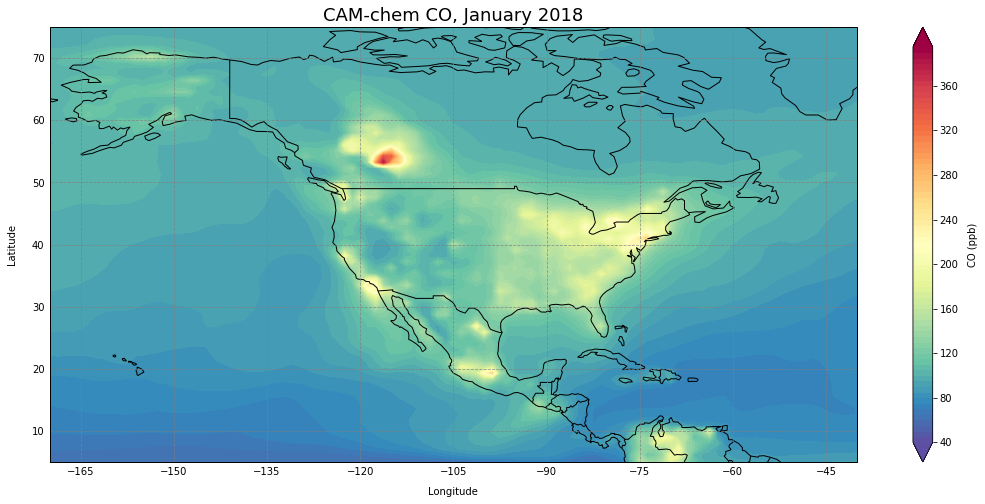

In [20]:
plt.figure(figsize=(20,8))

#Define projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Zoom to a region
#longitude limits in degrees
ax.set_xlim(-170,-40)
#latitude limits in degrees
ax.set_ylim(5,75)

#define contour levels
clev = np.arange(40, 400, 5)

#plot the data
plt.contourf(lon,lat,var_srf,clev,cmap='Spectral_r',extend='both')

# add coastlines
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

#add lat lon grids
gl = ax.gridlines(draw_labels=True, color='grey', alpha=0.8, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# Titles
# Main
plt.title("CAM-chem CO, January 2018",fontsize=18)

# y-axis
ax.text(-0.04, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
# x-axis
ax.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
# legend
ax.text(1.15, 0.5, 'CO (ppb)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

plt.colorbar()
plt.show() 